<a id="the_destination8"></a>
# <font color=blue> Tilburg University

# <font color=blue> Applied Economics Analysis

# <font color=blue> Python Final Project

|Name|ANR.|
|----|-------|
|Qingrui Zhang|155715|
|Carlos Marín|860863|

# Table of Content

<a href='#the_destination'> Innovation and Intellectual Property: The Patent Race </a>

<a href='#the_destination2'> Set Up: Main Variables </a>

<a href='#the_destination3'> 1. The General Model </a>

<a href='#the_destination4'> 2. Introducing a Subsidy </a>

<a href='#the_destination5'> 3. Simulation </a>

<a href='#the_destination51'> 3.1. What is the impact of a change over the probability of innovation? </a>

<a href='#the_destination52'> 3.2. What is the impact of a change over the subsidy type and value? </a>

<a href='#the_destination6'> 4.The Patent Race </a>

<a href='#the_destination7'> 5. Main Remarks </a>

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import random

<a id="the_destination"></a>
# Innovation and Intellectual Property: The Patent Race
<a href='#the_destination8'> ◀</a>

Innovation is one of the most paradigmatic concepts when talking about economic growth. Politicians, institutions, citizens, in other words, everyone has heard that innovation in the way of Research and Development (R&D) is one of the most important triggers of growth. Growth models like the Romer or Schumpeterian models focus all attention into innovation as the main driver of higher growth rates. 

But first, what is innovation? One of the most difficult questions is to identify which concepts fit into the definition of innovation. It is new ideas, products, patents? Does it include new processes, managerial practices? it is only understood as the cut of the edge inventions or may we understand it by any improvement over the production chain? For simplicity we will understand innovation as the number of patents in the economy. 

Now that we have an agreement of what is innovation, we need to understand the role that intellectual property plays when it comes to innovation. In principle, strong intellectual property rights generate higher incentives to innovate as it is more profitable to do so. Nonetheless, some authors consider that some property rights may lead to a social undesired outcome. In other words, if the property rights and laws surrounding innovation are very attractive it may be very interesting for many firms to innovate targeting the same objective. This situation may lead to a waste of resources since all the efforts are focused over the same goal resulting in an inefficient duplication of R&D costs (Scotchmer, 2004).

In this way, we first want to understand how the cost of R&D and private value a firm assigned to a patent determines the social and private optimum of firms entering the innovation process. In our approach we want to identify at the end if a patent race is good or bad for the economy, as well as, we want to understand what are the effects of introducing a subsidy in order to encourage the innovation process: would this lead to a patent race?

For doing so, we will introduce some modifications to the model of Intellectual Property discussed by ["Scotchmer (2004)"](https://mitpress.mit.edu/books/innovation-and-incentives). First of all, we consider different types of firms that are willing to innovate in order to obtain a patent, we consider each firm to have a different cost structure and a different assignation of the private value for the patent. 

The main idea is that when there is a common research goal, firms can come up with different ideas to reach that objective and then receive a profit due to the existence of a patent that protects their innovation over a defined period of time. The profit hence, is determined by the period of that patent protection ($T$). We first replicate how the cost and private value variables determine the social and private optimal number of firms depending on the probability of innovation and the profits that the firm will receive by obtaining a patent which is determined by how property rights are defined.

In section 2, we introduce a subsidy that could either affect the private value or the R&D cost. We conduct a sensitivity analysis in section 3 in order to determine how different probability values as well as different subsidy costs affect the social welfare, the optimal number of firms in the innovation process, and the social deadweight loss, for doing so, we simulate one thousand different scenarios. 

Finally, we analyze how($T$) plays a major role in the decision of firms entering the innovation process, hence increasing the costs associated with R&D. We end our analysis with some relevant conclusions of this simulation exercise.


<a id="the_destination2"></a>
## Set Up: Main Variables
<a href='#the_destination8'> ◀</a>

In this first section we want to approach the basic model of the innovation process. There are two main variables to be defined:
1. The probability of innovating is referred to the probability of a firm coming up with a new successful idea in the form of a patent, which for simplicity is defined to be the same for all firms.
2. The number of firms to be included in the market with a common research goal.


In [2]:
probability=0.5
number_of_firms=300

<a id="the_destination3"></a>
# 1. The General Model 
<a href='#the_destination8'> ◀</a>

As we previously explain, the innovation process depends in two main variables that determine the social and private benefit of the innovation process: 

1.	Potential private value of the patent
2.	The R&D cost

We generate random numbers for these two variables for all the firms specified in the set-up part.

In [3]:
cost=pm.Normal.dist(300,100).random(size=number_of_firms)
private_value = pm.Normal.dist(400,150).random(size=number_of_firms)

We then identify the optimal number of firms, both socially and at a firm level. At a firm level, innovation will occur as long as it is profitable. We explore two different ways to calculate how profitable is the innovation process, firstly by calculating the difference between the private value and the R&D cost, and secondly by calculating the ratio of the same two variables.

In [4]:
Number_of_firms=[]
DWL=[]

cost=pm.Normal.dist(300,100).random(size=number_of_firms)
private_value = pm.Normal.dist(400,150).random(size=number_of_firms)
    
#buliding DataFrame
Data={"cost": cost,
    "private_value":private_value}
Innovation=pd.DataFrame(Data)
   
Social_Value = np.sum(np.array(private_value))
   
#Join Innovation
Innovation['profit']=Innovation['private_value']-Innovation['cost']
Innovation['cp_ratio']=Innovation['cost']/Innovation['private_value']
Join_Innovation=Innovation[Innovation['profit']> 0]

From a social point of view: the objective is to maximize the total social value. Comparing the private cost of innovation with the expected marginal social value, we could obtain the optimum number of firms which will, from this social optimum, innovate. Here, the total social value is the summation of all the private value of firms, and the expected marginal social value is determined by the probability of success of innovation and total social value.

In [5]:
#Maximize the Social Value
def Marginal_social_value(P, MSV):
    return P*MSV
p=np.zeros(number_of_firms)
MSV=np.zeros(number_of_firms)
i=0
p[0]=probability
MSV[0]=Social_Value*p[0]
    
#Maximise social welfare
while Marginal_social_value(p[i],Social_Value)>cost[i]:
    i=i+1
    p[i]=(p[0])**(i+1)
    MSV[i]=p[i]*Social_Value

Number_of_firms.append

#the Deadweight Loss
Deadweight_Loss_SV=Social_Value-MSV.sum()
    
Number_of_firms.append(i)
DWL.append(Deadweight_Loss_SV)

From private point of view: the firms make decisions based on maximizing their own expected value and cost. The expected value is calculated as the product of the probability of success, which is the same for every firm, and the private value of the patent. Since every firm have different value and cost and they decide to invest aiming at getting the patent earlier so that they can obtain larger market share, we need to identify which firm will enter firstly. First of all, only the firms for who’s the innovation process is profitable will innovate (bigger private value than the cost of innovating). Second of all, we need to identify which firms will start the innovation process first, (Here is where the subtle difference of how to calculate the profits plays a major role) as we mentioned above, we have two different ways for doing so: (1) identifying the profitability by subtracting the private value and cost. Or instead of subtracting (2) calculating ratio of the innovation cost over private value. We then compare these two methods and identify the differences between them and in the simulation process we keep only one of them for simplicity.

In [6]:
#Maximise private welfare
    
#potential_of_firm
Marginal_Value=pd.DataFrame.sort_values(Join_Innovation,ascending=False,by='profit')
cost=np.array(Marginal_Value['cost'])
    
def expected_profit(n,PV):
    p=np.zeros(number_of_firms)
    i=0
    p[0]=probability
    while i<=n:
        i=i+1
        p[i]=1-(p[0])**(i+1)
    return p[i]*PV*1/n
    
n=1
Private_Value=np.array(Marginal_Value['private_value'])
    
while expected_profit(n,Private_Value[n-1])>cost[n-1]:
    n=n+1
    
#Deadweight Loss
Deadweight_Loss_PV=Social_Value-Private_Value[:n+1].sum()

Number_of_firms.append(n+1)
DWL.append(Deadweight_Loss_PV)
    
#Maximise private welfare
    
#cp_ratio
Marginal_Value_2=pd.DataFrame.sort_values(Join_Innovation,ascending=True,by='cp_ratio')
cost_2=np.array(Marginal_Value_2['cost'])
 
n=1
Private_Value_2=np.array(Marginal_Value_2['private_value'])
while expected_profit(n,Private_Value_2[n-1])>cost_2[n-1]:
    n=n+1

#Deadweight Loss
Deadweight_Loss_PV_2=Social_Value-Private_Value_2[:n+1].sum()

Number_of_firms.append(n+1)
DWL.append(Deadweight_Loss_PV_2)

Finally, we estimate the results.

In [7]:
results_1=pd.DataFrame({"Number_of_firms": Number_of_firms,
                      "DeadweightLoss": DWL})
results_1.index=['Social point of view','Private point of view_Subtraction','Private point of view_ratio']

In [8]:
print(results_1)

                                   DeadweightLoss  Number_of_firms
Social point of view                   239.132892                8
Private point of view_Subtraction   118587.109294                6
Private point of view_ratio         118809.270094                7


As the table shows, from the social point of view, there will be 8 firms investing in innovation and the deadweight loss will be 239.1m (*caveat: the previous number can change if the exercise is ran again due that the values are randomly assigned). Whereas, from the private point of view ranking by subtraction, 6 firms will enter and this leads a deadweight loss up to 118.5b. Meanwhile, 7 firms will enter in the case of ranking by ratio, and it will lead to 118.81b deadweight loss. 

As the results show, the deadweight losses from the private point of view are both higher than that from social point of view. Hence, we see that the final result, is that fewer firms, compared to the social optimum, will invest, thus, there will be always a loss over social welfare.

<a id="the_destination4"></a>
# 2. Introducing a Subsidy
<a href='#the_destination8'> ◀</a>

Now we introduce a subsidy over innovation. We will calculate the effects of the subsidy by including:

1. A subsidy over the private value: we assume that if the firm manage to innovate, it will be rewarded with twice of private value as profit (as an example that can be always be modified).
2. A subsidy over the innovation cost: we assume that the government will subsidy the cost of each firm in order to make it more profitable to innovate (percentage over the cost). In this case, we analyze a 50% subsidy over the cost.

Then by calculating the deadweight loss and the number of entering firm, we can judge which subsidy methods will be more useful for our analysis. We conduct exactly the same exercise as defined in section 1 with the two subsidy modifications.

In [9]:
# with subsidy_increase the private value

Number_of_firms=[]
DWL=[]

def expected_profit_with_subsidy_1(n,PV):
    p=np.zeros(number_of_firms)
    i=0
    p[0]=probability
    while i<=n:
        i=i+1
        p[i]=1-(p[0])**(i+1)
    return p[i]*PV*1/n
    
# propose to be rewarded with twice of its private value as profit
#in substraction
Marginal_Value_with_subsidy_1=pd.DataFrame.sort_values(Join_Innovation,ascending=False,by='profit')
cost_with_subsidy_1=np.array(Marginal_Value_with_subsidy_1['cost'])

Private_Value_with_subsidy_1=np.array(Marginal_Value_with_subsidy_1['private_value'])
n=1
while expected_profit_with_subsidy_1(n,Private_Value_with_subsidy_1[n-1]*2)>cost_with_subsidy_1[n-1]:
    n=n+1
Deadweight_Loss_with_subsidy_1=Social_Value-Private_Value_with_subsidy_1[:n+1].sum()
  
Number_of_firms.append(n)
DWL.append(Deadweight_Loss_with_subsidy_1)
    
# propose to be rewarded with whole social value as profit
#in cp_cost
Marginal_Value_with_subsidy_2=pd.DataFrame.sort_values(Join_Innovation,ascending=True,by='cp_ratio')
cost_with_subsidy_2=np.array(Marginal_Value_with_subsidy_2['cost'])
    
Private_Value_with_subsidy_2=np.array(Marginal_Value_with_subsidy_2['private_value'])

n=1
while expected_profit_with_subsidy_1(n,Private_Value_with_subsidy_2[n-1]*2)>cost_with_subsidy_2[n-1]:
    n=n+1

Deadweight_Loss_with_subsidy_2=Social_Value-Private_Value_with_subsidy_2[:n+1].sum()

Number_of_firms.append(n)
DWL.append(Deadweight_Loss_with_subsidy_2)

# with subsidy by decreasing the cost
def expected_profit_with_subsidy_2(n,PV):
    p=np.zeros(number_of_firms)
    i=0
    p[0]=probability
    while i<=n:
        i=i+1
        p[i]=1-(p[0])**(i+1)
    return p[i]*PV*1/n
    
#buliding DataFrame
subsidy_cost=0.5
Innovation['cost_subsidy']=Innovation['cost']*(1-subsidy_cost)
Social_Value = np.sum(np.array(private_value))
   
#Join Innovation
Innovation['profit_subsidy']=Innovation['private_value']-Innovation['cost_subsidy']
Innovation['cp_ratio_subsidy']=Innovation['cost_subsidy']/Innovation['private_value']
Join_Innovation_with_subsidy=Innovation[Innovation['profit_subsidy']>0]
    
#in subtraction
Marginal_Value_with_subsidy_3=pd.DataFrame.sort_values(Join_Innovation_with_subsidy,ascending=False,by='profit_subsidy')
cost_with_subsidy_3=np.array(Marginal_Value_with_subsidy_3['cost_subsidy'])
   
Private_Value_with_subsidy_3=np.array(Marginal_Value_with_subsidy_3['private_value'])
n=1
while expected_profit_with_subsidy_2(n,Private_Value_with_subsidy_3[n-1]*2)>cost_with_subsidy_3[n-1]:
    n=n+1

Deadweight_Loss_with_subsidy_3=Social_Value-Private_Value_with_subsidy_3[:n+1].sum()

Number_of_firms.append(n)
DWL.append(Deadweight_Loss_with_subsidy_3)

#in cp_cost
Marginal_Value_with_subsidy_4=pd.DataFrame.sort_values(Join_Innovation_with_subsidy,ascending=True,by='cp_ratio_subsidy')
cost_with_subsidy_4=np.array(Marginal_Value_with_subsidy_4['cost_subsidy'])
  
Private_Value_with_subsidy_4=np.array(Marginal_Value_with_subsidy_4['private_value'])
    
n=1
while expected_profit_with_subsidy_2(n,Private_Value_with_subsidy_4[n-1]*2)>cost_with_subsidy_4[n-1]:
    n=n+1
    
#Deadweight Loss
Deadweight_Loss_PV_4=Social_Value-Private_Value_with_subsidy_4[:n+1].sum()

Number_of_firms.append(n)
DWL.append(Deadweight_Loss_PV_4)

In [10]:
results_2=pd.DataFrame({"Number_of_firms": Number_of_firms,
                      "DeadweightLoss": DWL})
results_2.index=['Subsidy_of_profit_subtraction','Subsidy_of_profit_ratio','Subsidy_of_cost_subtraction','Subsidy_of_cost_ratio']
print(results_2)

                               DeadweightLoss  Number_of_firms
Subsidy_of_profit_subtraction   117264.573769                7
Subsidy_of_profit_ratio         117545.999551                9
Subsidy_of_cost_subtraction     115396.498264                9
Subsidy_of_cost_ratio           115272.682034               13


As the table shows, with the subsidy of profit, in both cases, there will be more firms entering and less deadweight loss. Because we defined in two methods to calculate the profits and sort the firms that will enter the innovation process, we need to conduct an analysis of each subsidy alternative with these two methods.

As we can see there are some differences between each method, nonetheless, for simplicity we will continue our simulation analysis using the ratio and subsidy of cost analysis as it seems to be more natural for example from the social point of view to subsidize the cost instead of the private value that is a more subjective variable. Nonetheless, all of this can be modified for future experiments.


<a id="the_destination5"></a>
# 3. Simulation 
<a href='#the_destination8'> ◀</a>

<a id="the_destination51"></a>
## 3.1. What is the impact of a change over the probability of innovation?

Having in mind the previous set-up, we will simulate all the possible scenarios, for doing so, we will not only generate different costs and private values, but also, we allow for different innovation probabilities. We want to identify, how all these variables are related with the innovation process and the decision for a firm to innovate. We decide to conduct one thousand scenarios in order to have a clear view of the relationship between all these variables.

In [13]:
probability_max=95
scenarios=1000

We generate the needed variables in order to continue with the simulation as follows:

In [14]:
prob=[]
social_val=[]
priv_val_sub=[]
priv_val_ratio=[]
optimum_soc_firms=[]
optimum_priv_firms_sub=[]
optimum_priv_firms_ratio=[]

We conduct the same general exercise as described in the first section of this work. We modify the probability value in each scenario, at the end we analyze the role that these variable plays over the innovation process and the different implications.

In [15]:
for i in range (scenarios):

    probability=np.random.randint(0.0001,probability_max)/100
    prob.append(probability)
    
    cost=abs(pm.Normal.dist(300,100).random(size=number_of_firms))
    private_value=abs(pm.Normal.dist(400,150).random(size=number_of_firms))
     
    #buliding DataFrame
    Data={"cost": cost,
          "private_value":private_value}
    Innovation=pd.DataFrame(Data)
   
    Social_Value = np.sum(np.array(private_value))
   
    #Join Innovation
    Innovation['profit']=Innovation['private_value']-Innovation['cost']
    Innovation['cp_ratio']=Innovation['cost']/Innovation['private_value']
    Join_Innovation=Innovation[Innovation['profit']> 0]

    #Maximize the Social Value
    def Marginal_social_value(P, MSV):
        return P*MSV
    p=np.zeros(number_of_firms)
    MSV=np.zeros(number_of_firms)
    i=0
    p[0]=probability
    MSV[0]=Social_Value*p[0]
    
    #Maximise social welfare
    while Marginal_social_value(p[i],Social_Value)>cost[i]:
        i=i+1
        p[i]=(p[0])**(i+1)
        MSV[i]=p[i]*Social_Value
    optimum_soc_firms.append(i)
    
    #the Deadweight Loss
    Deadweight_Loss_SV=Social_Value-MSV.sum()
    soc_val=MSV.sum()
    social_val.append(soc_val)
    
    #Maximise private welfare
    
    #subtraction
    Marginal_Value=pd.DataFrame.sort_values(Join_Innovation,ascending=False,by='profit')
    cost=np.array(Marginal_Value['cost'])
    
    def expected_profit(n,PV):
        p=np.zeros(number_of_firms)
        i=0
        p[0]=probability
        while i<=n:
            i=i+1
            p[i]=1-(p[0])**(i+1)
        return p[i]*PV*1/n
    
    n=1
    Private_Value=np.array(Marginal_Value['private_value'])
    
    while expected_profit(n,Private_Value[n-1])>cost[n-1]:
        n=n+1
    optimum_priv_firms_sub.append(n)
    
    #Deadweight Loss
    Deadweight_Loss_PV=Social_Value-Private_Value[:n+1].sum()
    priv_val_sub.append(Deadweight_Loss_PV)
    
    #Maximise private welfare
    
    #cp_ratio
    Marginal_Value_2=pd.DataFrame.sort_values(Join_Innovation,ascending=True,by='cp_ratio')
    cost_2=np.array(Marginal_Value_2['cost'])
 
    n=1
    Private_Value_2=np.array(Marginal_Value_2['private_value'])
    while expected_profit(n,Private_Value_2[n-1])>cost_2[n-1]:
        n=n+1
    optimum_priv_firms_ratio.append(n)

    #Deadweight Loss
    Deadweight_Loss_PV_2=Social_Value-Private_Value_2[:n+1].sum()
    priv_val_ratio.append(Deadweight_Loss_PV_2)

In [16]:
table={'probability':prob, 'Social Value':social_val, 'Private Value Substracting Profits':priv_val_sub,'Private Value Profits Ratio Method':priv_val_ratio, 'Optimum Social Number of Firms':optimum_soc_firms, 'Optimum Number of Private Firms: Substracting':optimum_priv_firms_sub,'Optimum Number of Private Firms: Ratio':optimum_priv_firms_ratio}
tabledf=pd.DataFrame(data=table)
tabledf

,Optimum Number of Private Firms: Ratio,Optimum Number of Private Firms: Substracting,Optimum Social Number of Firms,Private Value Profits Ratio Method,Private Value Substracting Profits,Social Value,probability
0,6,3,21,117459.602825,117998.007107,3.617184e+05,0.75
1,4,2,63,116562.216816,117367.522028,1.202430e+06,0.91
2,4,3,52,114986.019892,114832.803963,9.482644e+05,0.89
3,5,4,5,120242.237451,119970.415822,5.805562e+04,0.32
4,7,3,11,115080.187456,116017.959867,1.511826e+05,0.56
5,4,2,38,120340.509063,120473.032731,7.505994e+05,0.86
6,6,4,1,113970.547984,114241.279150,2.396804e+03,0.02
7,7,4,3,118092.689434,118250.203026,2.672776e+04,0.18
8,7,6,4,111195.275983,111180.758556,3.449901e+04,0.23
9,6,4,2,112255.263026,112355.034261,1.427541e+04,0.11


As expected, Figure 1 shows that an increase in the innovation probability would lead to an increase in the social welfare, nonetheless, this is a nonlinear relationship, as it seems to have a major impact when the values of the probability are high (above 80%).

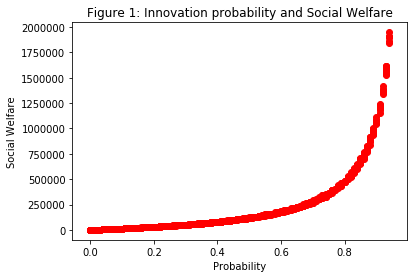

In [18]:
plt.scatter(prob, social_val, color = 'r')
plt.xlabel('Probability')
plt.ylabel('Social Welfare')
plt.title('Figure 1: Innovation probability and Social Welfare')
plt.show()

Also, we can see that with small probability values for innovation, the number of firms is higher than the social optimum (Figure 2). This is because, the innovation process is still profitable for firms, even though because of the way we define the social welfare, we expect to have no innovation. This is because the marginal social value is determined also by the probability. In other words, with small probability values the marginal increase is so small that will not be good from a social point of view, to have another firm enter into the innovation process.

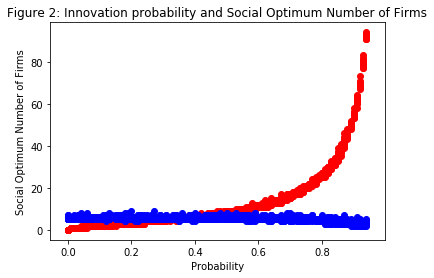

In [19]:
plt.scatter(prob, optimum_soc_firms, color = 'r')
plt.scatter(prob, optimum_priv_firms_ratio, color = 'b')
plt.xlabel('Probability')
plt.ylabel('Social Optimum Number of Firms')
plt.title('Figure 2: Innovation probability and Social Optimum Number of Firms')
plt.show()

<a id="the_destination52"></a>
## 3.2. What is the impact of a change over the subsidy type and value?
<a href='#the_destination8'> ◀</a>

Now, we want to analyze how sensible is the innovation decision to any kind of subsidy given by a Social Planner. In this way, we set again the probability of innovation to 50 percent and set as a random variable the degree of subsidy that private firms would be receive.

In [20]:
probability_inn=0.5
subsidy_max=100

We generate the needed variables in order to continue with the simulation as follows and run exactly the same exercise as in the previous cases.

In [21]:
sub=[]
medianprofit=[]
optimum_priv_firms_ratio_subcost=[]
priv_val_ratio_subcost=[]

In [22]:
for i in range (scenarios):
    
    cost=abs(pm.Normal.dist(300,100).random(size=number_of_firms))
    private_value=abs(pm.Normal.dist(400,150).random(size=number_of_firms))
              
    # with subsidy by decreasing the cost
    def expected_profit_with_subsidy_2(n,PV):
        p=np.zeros(number_of_firms)
        i=0
        p[0]=probability_inn
        while i<=n:
            i=i+1
            p[i]=1-(p[0])**(i+1)
        return p[i]*PV*1/n
       
    #buliding DataFrame
    subsidy_cost=np.random.randint(subsidy_max)/100
    sub.append(subsidy_cost)
    Innovation['cost_subsidy']=Innovation['cost']*(1-subsidy_cost)
    Social_Value = np.sum(np.array(private_value))
   
    #Join Innovation
    Innovation['profit']=Innovation['private_value']-Innovation['cost_subsidy']
    Innovation['cp_ratio_subsidy']=Innovation['cost_subsidy']/Innovation['private_value']
    Join_Innovation_with_subsidy=Innovation[Innovation['profit']>0]
    profit_bar=Innovation['profit'].median()
    medianprofit.append(profit_bar)
    
    #in cp_cost
    Marginal_Value_with_subsidy_4=pd.DataFrame.sort_values(Join_Innovation_with_subsidy,ascending=True,by='cp_ratio_subsidy')
    cost_with_subsidy_4=np.array(Marginal_Value_with_subsidy_4['cost_subsidy'])
  
    Private_Value_with_subsidy_4=np.array(Marginal_Value_with_subsidy_4['private_value'])
    
    n=1
    while expected_profit_with_subsidy_2(n,Private_Value_with_subsidy_4[n-1]*2)>cost_with_subsidy_4[n-1]:
        n=n+1
    optimum_priv_firms_ratio_subcost.append(n)
    
    #Deadweight Loss
    Deadweight_Loss_PV_4=Social_Value-Private_Value_with_subsidy_4[:n+1].sum()
    priv_val_ratio_subcost.append(Deadweight_Loss_PV_4)

Figure 3 allows to see that the higher the value of the subsidy the higher, the value of the social welfare, so the more firms can enter to the market: perfect competition market. Nonetheless, it is important to remember that the subsidy must be financed via taxes. A big subsidy amount is also not optimal, since it would be beneficial even for firms that are not competitive in the market, which at the end would be a situation that would reward the inefficiency of private firms. As we can see, only the most inefficient firms would not be entering the innovation process, this does not mean that the last ones entering are not efficient at all.

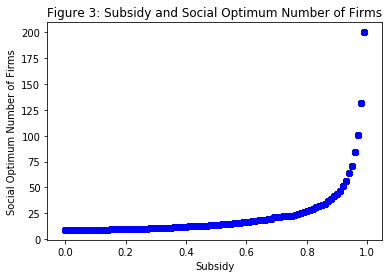

In [23]:
plt.scatter(sub,optimum_priv_firms_ratio_subcost, color = 'b')
plt.xlabel('Subsidy')
plt.ylabel('Social Optimum Number of Firms')
plt.title('Figure 3: Subsidy and Social Optimum Number of Firms')
plt.show()

Figure 4 shows that the relationship between the subsidy assigned by the social planner and the median profit of firms is almost linear.

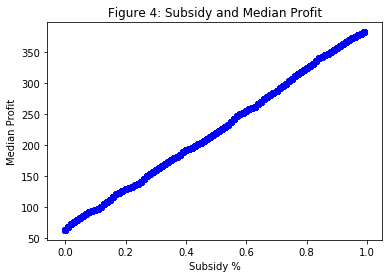

In [24]:
plt.scatter(sub,medianprofit, color = 'b')
plt.xlabel('Subsidy %')
plt.ylabel('Median Profit')
plt.title('Figure 4: Subsidy and Median Profit')
plt.show()

<a id="the_destination6"></a>
# 4. The Patent Race
<a href='#the_destination8'> ◀</a>

Finally, in this section we analyze how the duration of a patent would lead to a patent race. In principle, only one firm (the one innovating at first) would have access to the patent, hence would be able to have market power for a certain period of time. The other firms that were also innovating would be having losses as their expected profit is zero. We set up the variables considering the 300 firms as in the beginning of the exercise and conduct the experiment by assigning different duration values (from 1 year to 10 years). We also run, one thousand scenarios.

In [25]:
probability_min=10
probability_max=70
scenarios=1000
min_years_patent=1
max_years_patent=10

We generate the needed variables in order to continue with the simulation as follows:

In [26]:
T=[]
Number_of_firms_patent_race=[]
firms=[]

In [27]:
for i in range (scenarios):
    
    p=np.zeros(300)
    MSV=np.zeros(300)
    
    probability=np.random.randint(probability_min,probability_max,size=300)/100
    cost=abs(pm.Normal.dist(300,100).random(size=300))
    private_value=abs(pm.Normal.dist(600,100).random(size=300))
     
    #buliding DataFrame
    Data={"cost": cost,
          "private_value":private_value,
          "probability":probability}
    Innovation=pd.DataFrame(Data)
   
    Social_Value = np.sum(np.array(private_value))
   
    #Join Innovation
    Innovation['profit']=Innovation['private_value']-Innovation['cost']
    Innovation['expected_profit']=Innovation['profit']*Innovation['probability']
    Innovation['cp_ratio']=Innovation['cost']/Innovation['private_value']
    Innovation['duration']=Innovation['cost']/(Innovation['private_value']*Innovation['expected_profit'])*100
    
    T_star=np.random.randint(min_years_patent,max_years_patent)
    T.append(T_star)
    
    firms_innovating0=Innovation[Innovation['expected_profit']> 0]
    firms_innovating=firms_innovating0[firms_innovating0['duration']<T_star]
    number_of_firms=firms_innovating['duration'].count()
    firms.append(number_of_firms)
  
    #Patent Race
    def Marginal_social_value(P, MSV):
        return P*MSV

    probability_bar=firms_innovating['probability'].mean()
    Limited_Social_Value=np.sum(np.array(firms_innovating['private_value']))
    Marginal_Value_Patent_race=pd.DataFrame.sort_values(firms_innovating,ascending=False,by='probability')
    cost_patent_race=np.array(Marginal_Value_Patent_race['cost'])
    
    i=0
    p[0]=probability_bar
    MSV[0]=Limited_Social_Value*p[0]
    
    if firms_innovating.empty:
        i=0
    else:
        if cost_patent_race==[]:
            break
        else:
            while Marginal_social_value(p[i],Limited_Social_Value)>cost_patent_race[i]:
                i=i+1
                p[i]=(p[0])**(i+1)
                MSV[i]=p[i]*Limited_Social_Value
                if i>=number_of_firms:
                    break
                    
    Number_of_firms_patent_race.append(i)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


As expected, Figure 5 allows us to see that an increase in the duration of the patent ($T$), would make very attractive any innovation decision, as it makes it very profitable because of the market power that comes from acquiring a patent. There is a positive relationship between ($T$) and the number of firms innovating. This is what according Scotchmer (2004) identifies as inefficient, as it leads to an enormous amount of resources focused on only one goal with only one firm obtaining the benefits.

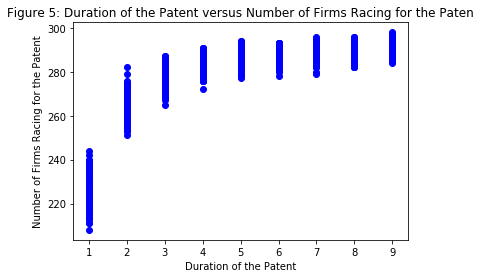

In [28]:
plt.scatter(T,firms, color = 'b')
plt.xlabel('Duration of the Patent')
plt.ylabel('Number of Firms Racing for the Patent')
plt.title('Figure 5: Duration of the Patent versus Number of Firms Racing for the Paten')
plt.show()

<a id="the_destination7"></a>
# 5. Main Remarks
<a href='#the_destination8'> ◀</a>

Some of the main remarks:
1. An increase over the probability of innovation would lead to an increase in the social welfare. This is important because it points out the importance of targeting efforts over efficiency and all variables that make this probability increase upon time.

2. Further analysis must be done in order to determine the role that firms with small probability plays in all the innovation process. As shown, small probabilities may lead to a suboptimal social outcome. According to the growth models mentioned at the beginning of this exercise, it is possible, and maybe more social welfare enhancing, for this firms to focus all efforts in imitation skills rather than innovation. Nonetheless, this requires a more complex analysis, including growth theory context.

3. A subsidy is a good way to incentivize the innovation process. Nonetheless, we should not forget that it must be financed via taxes. Also, inefficient firms are going to receive a subsidy, even though they have low probability of innovation.

4. The optimal duration of a patent must be determined by the social planner considering two opposite things: (1) higher duration may lead to inefficiencies as all firms will be trying to innovate. And (2) small duration patents would not be attractive if the time horizon is not enough for them to have profits. The optimum duration of the patent will depend in the size of the market, few years of property rights in two or three firms would be enough to encourage a patent race.

<a href='#the_destination8'> Back to top </a>